# Polynomial Interpolation – Exercise 1, Problem 3


## Lagrange Interpolasjon


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

In [2]:
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = np.ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

In [3]:
def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by `cardinal(xdata, x)`
    Return: An array with the interpolation polynomial (evaluated at `x`). 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

### a) Interpolasjon av data

[ 1.      1.5984 -0.6564 -1.6828 -0.1191  0.2114 -0.3514  1.    ]
[ 0.      0.7818  0.975   0.4339 -0.4339 -0.975  -0.7818  0.    ]
[0.     0.8976 1.7952 2.6928 3.5904 4.488  5.3856 6.2832]


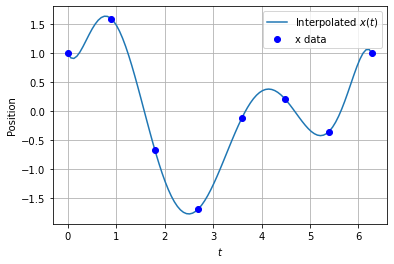

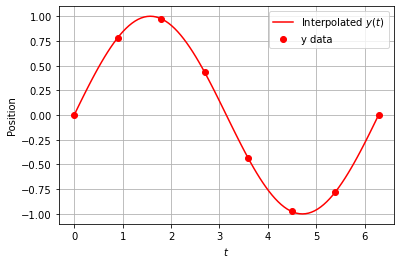

In [4]:
# Interpolation data
tdata = np.array([0 , 0.8976, 1.7952, 2.6928, 3.5904 , 4.4880 , 5.3856 , 6.2832])
xdata = np.array([1 , 1.5984, -0.6564 , -1.6828 , -0.1191 ,0.2114, -0.3514 , 1 ])
ydata = np.array([0 , 0.7818, 0.9750, 0.4339, -0.4339, -0.975, -0.7818, 0])
print(xdata)
print(ydata)
print(tdata)
    
# Grid points for plotting
t = np.linspace(0,tdata[-1],101)

# Get cardinal functions evaluated at grid points t
li = cardinal(tdata,t)

#Use cardinal functions to construct the interpolator for x(t)
px = lagrange(xdata,li)

#Use cardinal functions to construct the interpolator for y(t)
py = lagrange(ydata,li)

#Plot the interpolating polynomials and data points -  x coordinate
plt.plot(t, px, tdata, xdata,'ob')
plt.legend(['Interpolated $x(t)$', 'x data'])
plt.xlabel('$t$')
plt.ylabel('Position')
plt.grid(True)
#plt.savefig("xt_v2",dpi = 200)
#plt.clf()
plt.show()

#Plot the interpolating polynomials and data points - y coordinate
plt.plot(t, py, 'r', tdata, ydata, 'ro')
plt.legend(['Interpolated $y(t)$',  'y data'])
plt.xlabel('$t$')
plt.ylabel('Position')
plt.grid(True)
#plt.savefig("yt_v2",dpi = 200)
plt.show()

### b) Trajectory

The trajectory of a particle moving in $\mathbb{R}^2$ is the locus of all $(x,y)$ points traveled by the particle. Therefore, all we have to do is plot the interpolation of $x$ against the interpolation of $y$:


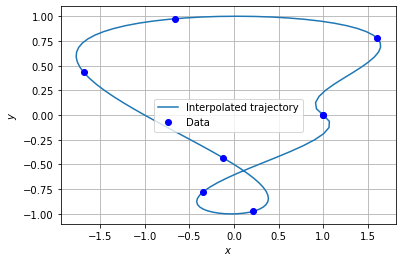

In [5]:
plt.plot(px, py, xdata, ydata,'ob')
plt.legend(['Interpolated trajectory', 'Data'])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.savefig("yx_v2",dpi = 200)

### d) Comparison with the original trajectory

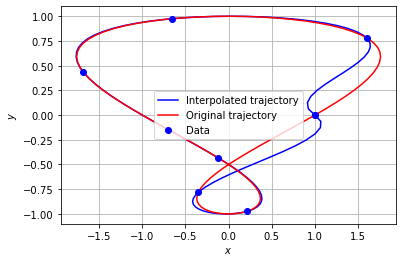

In [6]:
# Definition of the parametric curves
def x(t): return np.cos(t)+np.sin(2*t)
def y(t): return np.sin(t)

plt.plot(px, py,'b', x(t), y(t), 'r',  xdata, ydata,'ob')
plt.legend(['Interpolated trajectory', 'Original trajectory', 'Data'])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.savefig("yx_ex_v2",dpi = 200)

We can see that the interpolation is in general good, but the error results in being bigger at the start and end points since the algorithm does not know that the helicopter is describing a closed curve.
